In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

motor_train = pd.read_csv('motor_train.csv')
motor_test = pd.read_csv('motor_test.csv')

motor_train.head(10)
motor_test.head(10)


,class,peak,trough,mean,RMS,Crest_Factor
0,1,0.50823,-0.45133,0.151352,0.187720,2.707387
1,1,0.50823,-0.48971,0.156289,0.192089,2.645803
2,1,0.39308,-0.45133,0.163987,0.202870,1.937596
3,1,0.39308,-0.56647,0.167843,0.211949,1.854599
4,1,0.39473,-0.44968,0.164167,0.202855,1.945871
5,1,0.39473,-0.56483,0.168229,0.211970,1.862199
6,1,0.39473,-0.60321,0.185904,0.231504,1.705069
7,1,0.43311,-0.60321,0.185154,0.232290,1.864521
8,1,0.39308,-0.60486,0.185633,0.231502,1.697954
9,1,0.43146,-0.60486,0.184883,0.232321,1.857169


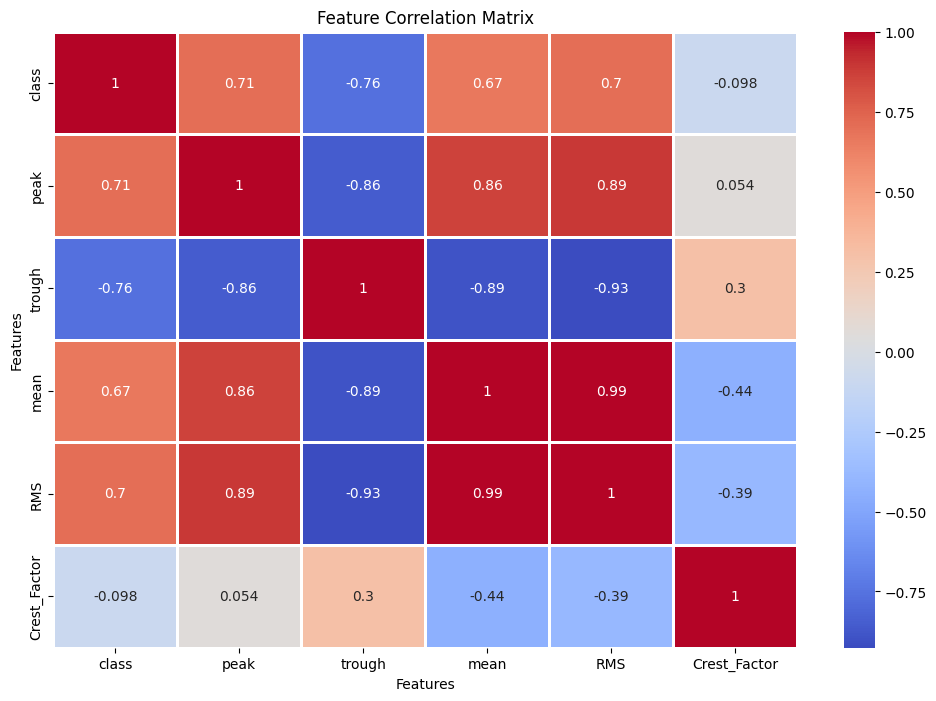

In [2]:
# 상관 관계 계산
correlation_matrix = motor_train.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# 그래프 타이틀 및 라벨 설정
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# 그래프 보여주기
plt.show()

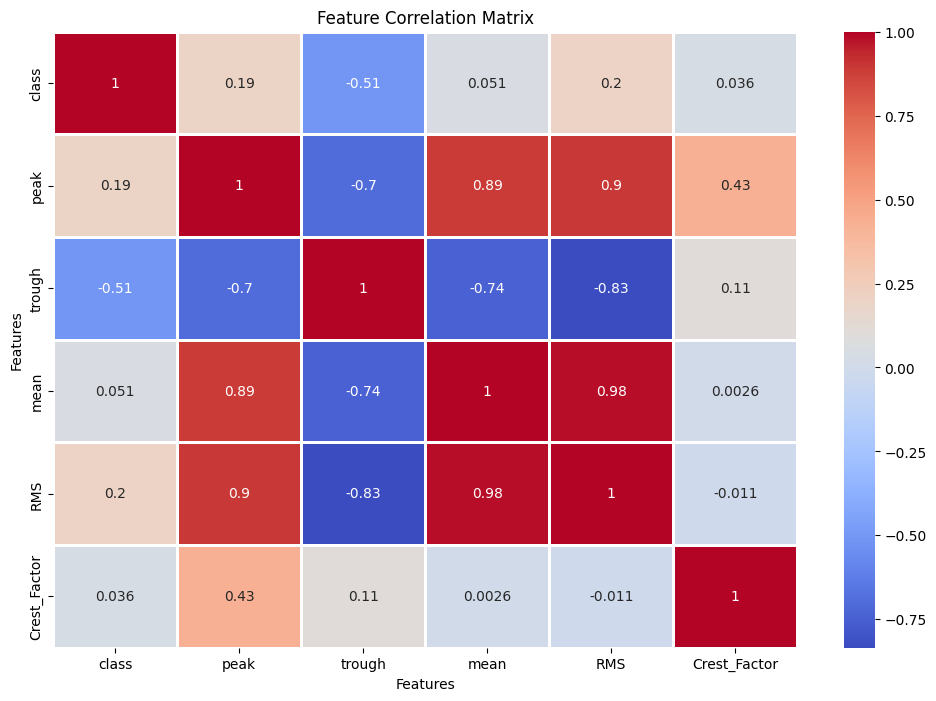

In [3]:
# 상관 관계 계산
correlation_matrix = motor_test.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# 그래프 타이틀 및 라벨 설정
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# 그래프 보여주기
plt.show()

0.816150178784267
0.9469575660528423
0.7489314548044959
0.8363829223017767
[[3486 1586]
 [ 265 4731]]


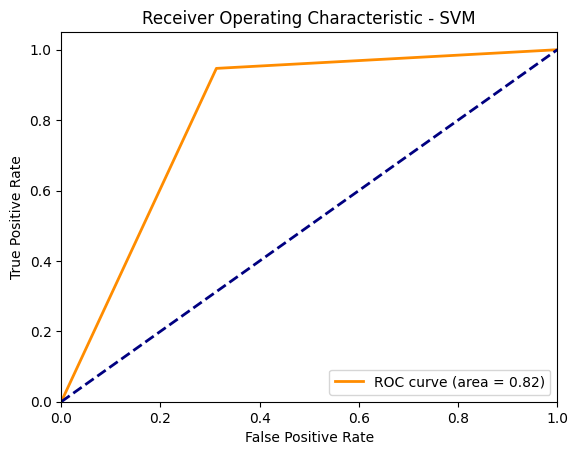

In [4]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, auc


x_train = motor_train.drop("class", axis=1)
y_train = motor_train["class"]
x_test = motor_test.drop("class", axis=1)
y_test = motor_test["class"]


#model Create
model = LinearSVC(C=10, random_state=13, dual='auto')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Logistic Regression model verification
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)

# 테스트 데이터에 대한 예측 확률 계산
# y_pred_proba = model.predict_proba(x_test)[:,1]
# test -1

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

In [54]:
SS = StandardScaler()
MM = MinMaxScaler()

x_train_ss = SS.fit_transform(x_train)
x_test_ss = SS.transform(x_test)

x_train_MM = MM.fit_transform(x_train)
x_test_MM = MM.transform(x_test)

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Hyper Parameter searching
svm = SVC(probability=True)

param = {
    'C': [0.1, 1, 5], 
    'gamma': [1, 0.1, 0.01],
}

grid_search = GridSearchCV(svm, param, cv=3, scoring='roc_auc')
grid_search.fit(x_train_ss, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 5, 'gamma': 0.1}
Best Score: 0.9312581931065665


0.8678982916170044
0.9737790232185749
0.8022757255936676
0.879746835443038
[[3873 1199]
 [ 131 4865]]


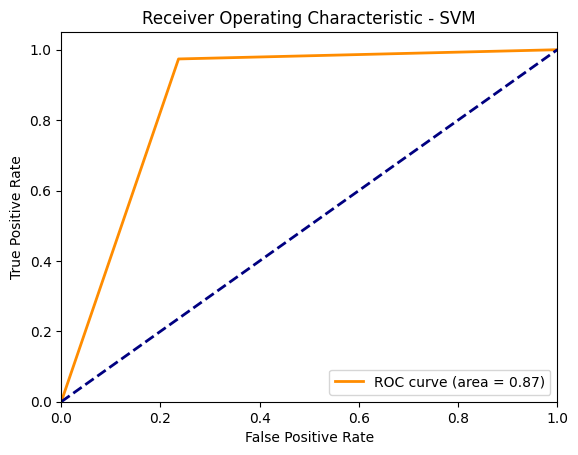

In [58]:
# ROC 커브 계산 basic : y_pred  /  tuning : y_pred_hyper
# ROC 커브 계산 basic : x_train / x_test  /  tuning : y_train / y_test
# x_train_ss / x_test_ss / x_train_MM / x_test_MM

# y_pred = model.predict(x_train_ss)

y_pred_hyper = grid_search.best_estimator_.predict(x_test_ss)

accuracy = accuracy_score(y_test, y_pred_hyper)
recall = recall_score(y_test, y_pred_hyper)
precision = precision_score(y_test, y_pred_hyper)
f1 = f1_score(y_test, y_pred_hyper)
conf_matrix = confusion_matrix(y_test, y_pred_hyper)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_hyper)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")

path = os.path.join('motor_images_' + 'tuning_test_SS_2' + '.png')
plt.savefig(path, dpi=300, format='png')